#### To Do List
1. Everyone experiment with different models - see if we can get a high predicition score
2. Figure out what Rios means by reporting validation results using cross validation
3. Figure out how to write code to replace the current labels with the predictions from our model

## Libraries

In [140]:
import csv
import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

## Data Preparation

#### Load the training and test sentiment datasets "test.tsv" and "train.tsv"

In [125]:
X_text_train = []
y_train = []

with open('train.tsv') as file:
    tsv_reader = csv.reader(file, delimiter = '\t', quoting = csv.QUOTE_NONE)
    
    for row in tsv_reader:
        X_text_train.append(row[1]) #text being processed
        y_train.append(row[2]) #label
        
X_text_test = []
y_test = []

with open('test.tsv') as file:
    tsv_reader = csv.reader(file, delimiter = '\t', quoting = csv.QUOTE_NONE)
    
    for row in tsv_reader:
        X_text_test.append(row[1]) #text being processed
        y_test.append(row[2]) #label

#### Visualize Training Data

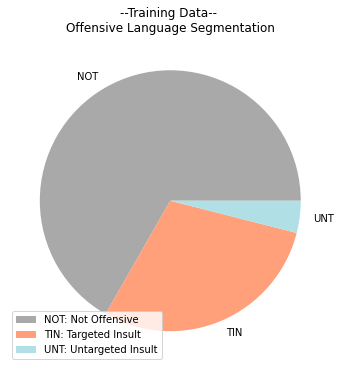

In [146]:
with open('train.tsv') as file:
    train_file = csv.reader(file, delimiter = '\t', quoting = csv.QUOTE_NONE)
    train_df = pd.DataFrame(train_file)

color_theme = ['darkgray', 'lightsalmon', 'powderblue']
labels = ['NOT: Not Offensive', 'TIN: Targeted Insult', 'UNT: Untargeted Insult']
    
train_df[2].value_counts().plot.pie(figsize = (6,6), title = '--Training Data-- \nOffensive Language Segmentation', ylabel = '', colors = color_theme )
plt.legend(labels, loc = 3)

#### Convert X_text_train and X_text_test to matricies of numbers 

In [126]:
np.random.seed(42)
random.seed(42)

vec = CountVectorizer(ngram_range = (1,1))

X_train = vec.fit_transform(X_text_train) 
X_test = vec.transform(X_text_test) 

<br>

## (1) LinearSVC Classifier

#### Initialize the classifier LinearSVC, Create the params with the C values

In [127]:
svc = LinearSVC()

params = {"C": [0.0001, 0.001, 0.001, 0.01, 0.1, 1., 10., 100.]}

#### Initialize GridSearchCV and Fit the Model

In [128]:
clf = GridSearchCV(svc, params, cv = 20, scoring = 'f1_micro')
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=20, estimator=LinearSVC(),
             param_grid={'C': [0.0001, 0.001, 0.001, 0.01, 0.1, 1.0, 10.0,
                               100.0]},
             scoring='f1_micro')

#### Get the score from the GridSearchCV "best score" and Best Parameters

In [129]:
validation_score = clf.best_score_ 
print("Validation: {:.4f}".format(validation_score))

best_parameters = clf.best_params_
print(f"Best Params: {best_parameters}")

Validation: 0.7357
Best Params: {'C': 0.1}


#### "predict" on X_test 

In [130]:
svm_test_predictions = clf.predict(X_test) 

#### Get scores using svm_test_predictions and y_test with the precision_score method

In [131]:
precision = precision_score(y_test, svm_test_predictions, average = 'micro')
recall = recall_score(y_test, svm_test_predictions, average = 'micro')
f1 = f1_score(y_test, svm_test_predictions, average = 'micro')

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print("**Scoring**\n")
print("Train Accuracy: {:.4f}".format(train_score))
print("Test Accuracy: {:.4f}\n".format(test_score))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1: {:.4f}".format(f1))

**Scoring**

Train Accuracy: 0.9164
Test Accuracy: 0.7753

Precision: 0.7753
Recall: 0.7753
F1: 0.7753


#### Store predictions and write to a new CSV

In [132]:
# Store predictions
svm_test_predictions_df = pd.DataFrame(data = svm_test_predictions)

# Write to a csv
with open('test.tsv') as file:
    test_file = csv.reader(file, delimiter = '\t', quoting = csv.QUOTE_NONE)
    test_df = pd.DataFrame(test_file)
    
test_df[2] = svm_test_predictions_df[0]
test_df.columns = ['TWITTER_ID', 'TEXT', 'PREDICTIONS']
test_df.to_csv('00. LinearSVC Prediction Results.csv', index = False)

<br>

## (2) RandomForestClassifier

#### Build Parameter Grid

In [133]:
n_estimators = [10, 30, 50, 70, 90, 100]

parameters = {'n_estimators': n_estimators}

#### Initialize the RandomForest classifier

In [134]:
rand_forest = RandomForestClassifier()

#### Initialize GridSearchCV and Fit the Model

In [135]:
clf_rand = GridSearchCV(rand_forest, parameters, cv = 5, verbose = 2)
clf_rand.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   1.8s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   1.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.6s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.5s
[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=   4.9s
[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=   4.8s
[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=   4.7s
[CV] n_estimators=30 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 30, 50, 70, 90, 100]}, verbose=2)

#### Get the score from the GridSearchCV "best score" and Best Parameters

In [136]:
validation_score = clf_rand.best_score_ 
print("Validation: {:.4f}".format(validation_score))

best_parameters = clf_rand.best_params_
print(f"Best Params: {best_parameters}")

Validation: 0.7386
Best Params: {'n_estimators': 100}


#### "predict" on X_test 

In [137]:
rand_test_predictions = clf_rand.predict(X_test) 

#### Get scores using rand_forest_predictions and y_test with the precision_score method

In [138]:
precision = precision_score(y_test, rand_test_predictions, average = 'micro')
recall = recall_score(y_test, rand_test_predictions, average = 'micro')
f1 = f1_score(y_test, rand_test_predictions, average = 'micro')

rand_train_score = clf_rand.score(X_train, y_train)
rand_test_score = clf_rand.score(X_test, y_test)

print("**Scoring**\n")
print("Train Accuracy: {:.4f}".format(rand_train_score))
print("Test Accuracy: {:.4f}\n".format(rand_test_score))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1: {:.4f}".format(f1))

**Scoring**

Train Accuracy: 0.9985
Test Accuracy: 0.8603

Precision: 0.8603
Recall: 0.8603
F1: 0.8603


#### Store predictions and write to CSV

In [139]:
# Store predictions
rand_test_predictions_df = pd.DataFrame(data = rand_test_predictions)

# Write to a csv
with open('test.tsv') as file:
    test_file = csv.reader(file, delimiter = '\t', quoting = csv.QUOTE_NONE)
    test_df = pd.DataFrame(test_file)
    
test_df[2] = rand_test_predictions_df[0]
test_df.columns = ['TWITTER_ID', 'TEXT', 'PREDICTIONS']
test_df.to_csv('00. RandomForest Prediction Results.csv', index = False)

<br>